# Loan Approval Prediction

**Objective:** Predict whether a loan application will be approved based on applicant details.  

We’ll train classification models (Logistic Regression & Decision Tree) using the **Loan Approval Prediction dataset** from Kaggle.  

## Sections
1. Data Understanding  
2. Data Cleaning & Preprocessing  
3. Exploratory Data Analysis (EDA)  
4. Modeling (Logistic Regression & Decision Tree)  
5. Evaluation (Accuracy, Precision, Recall, F1)  
6. Conclusion  

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

sns.set_theme()

## 1. Data Understanding

In [8]:
# Load dataset
df = pd.read_csv("loan_approval_dataset.csv")  

# Normalize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
# Preview
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [9]:
print("Rows, Columns:", df.shape)
df.info()
df.describe()

Rows, Columns: (4269, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [10]:
print("Missing values per column:\n", df.isnull().sum())
print("Duplicate rows:", df.duplicated().sum())

# Handling missing values (filling numerical with mean, categorical with mode)
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())


Missing values per column:
 loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64
Duplicate rows: 0


## 2. Exploratory Data Analysis (EDA)

We’ll visualize categorical distributions and see how they relate to loan approval.

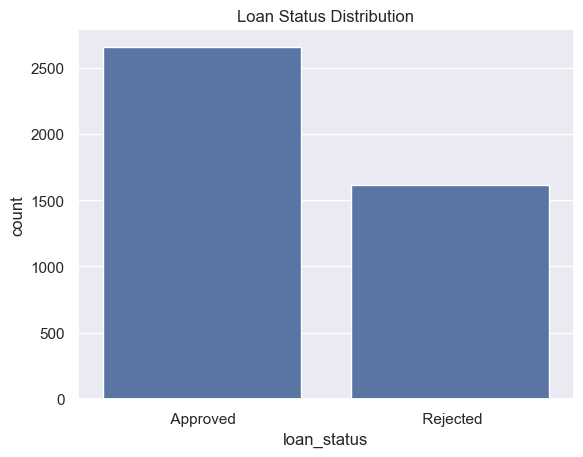

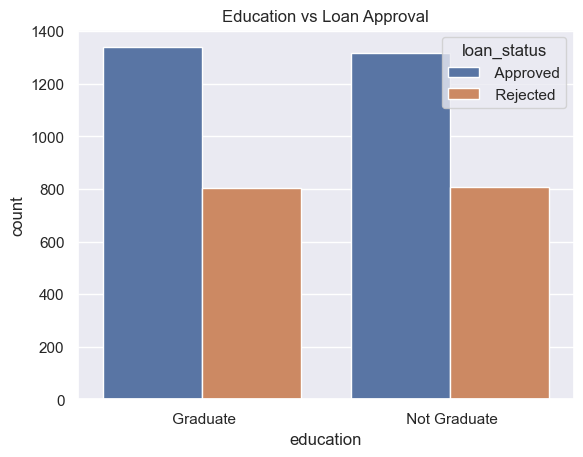

In [11]:
# Target distribution
sns.countplot(data=df, x="loan_status")
plt.title("Loan Status Distribution")
plt.show()

# Example: Education vs Loan_Status
sns.countplot(data=df, x="education", hue="loan_status")
plt.title("Education vs Loan Approval")
plt.show()


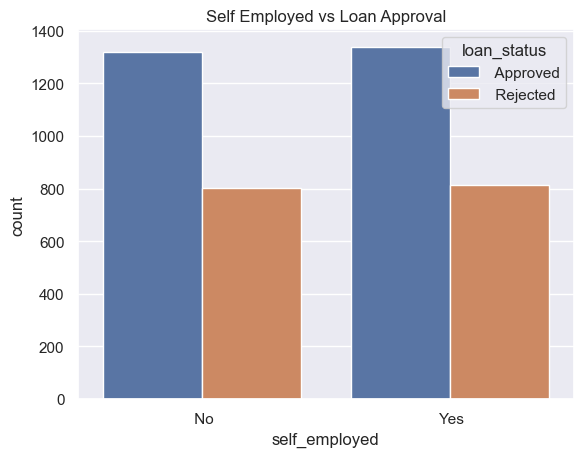

In [12]:

# Self Employed vs Loan_Status
sns.countplot(data=df, x="self_employed", hue="loan_status")
plt.title("Self Employed vs Loan Approval")
plt.show()

## 3. Data Cleaning & Preprocessing

- Encode categorical variables.  
- Select features and target.  
- Split into train/test sets.  

In [14]:
# Encode categorical variables
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Features & target
X = df_encoded.drop("loan_status", axis=1)
y = df_encoded["loan_status"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## 4a. Modeling — Logistic Regression

In [16]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))


Logistic Regression Accuracy: 0.8220140515222483
Precision: 0.8267716535433071
Recall: 0.660377358490566
F1 Score: 0.7342657342657343


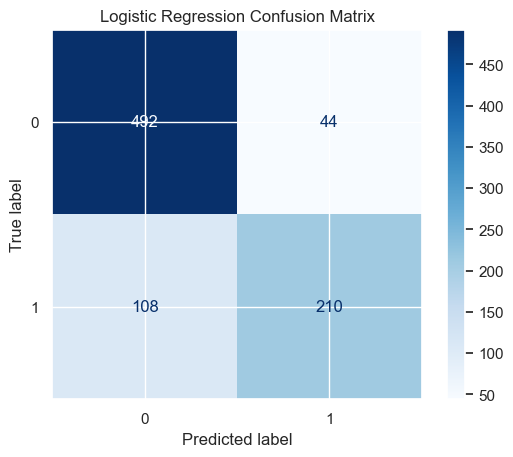

In [17]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log, cmap="Blues")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

## 4b. Modeling — Decision Tree

In [18]:
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Precision:", precision_score(y_test, y_pred_tree))
print("Recall:", recall_score(y_test, y_pred_tree))
print("F1 Score:", f1_score(y_test, y_pred_tree))

Decision Tree Accuracy: 0.9672131147540983
Precision: 0.9393939393939394
Recall: 0.9748427672955975
F1 Score: 0.9567901234567902


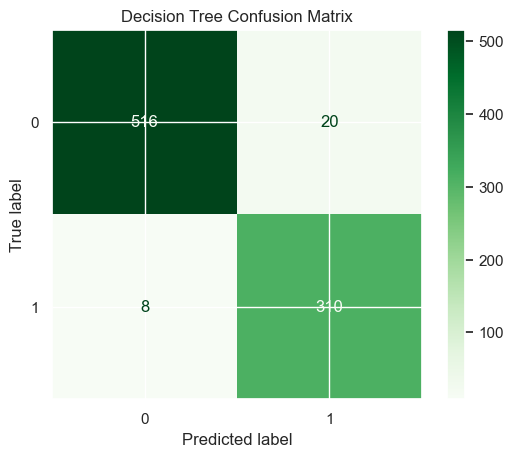

In [19]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree, cmap="Greens")
plt.title("Decision Tree Confusion Matrix")
plt.show()

## 5. Conclusion

- Logistic Regression provides a baseline linear classifier.  
- Decision Tree may capture non-linear interactions.  
- Evaluation metrics (Accuracy, Precision, Recall, F1) show tradeoffs between models.  
- Handling imbalanced data (SMOTE / class weights) could further improve performance.  

## 6. Bonus: Handling Imbalanced Data (SMOTE)

Loan approval datasets are often **imbalanced** (e.g., more approved loans than rejected).  
We’ll apply **SMOTE (Synthetic Minority Oversampling Technique)** to balance the classes and retrain the models.


In [21]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts().to_dict())
print("After SMOTE:", y_train_bal.value_counts().to_dict())


Before SMOTE: {0: 2120, 1: 1295}
After SMOTE: {0: 2120, 1: 2120}


In [22]:
# retrain regression logic
log_reg_smote = LogisticRegression(max_iter=1000)
log_reg_smote.fit(X_train_bal, y_train_bal)

y_pred_log_smote = log_reg_smote.predict(X_test)

print("Logistic Regression (SMOTE) Accuracy:", accuracy_score(y_test, y_pred_log_smote))
print("Precision:", precision_score(y_test, y_pred_log_smote))
print("Recall:", recall_score(y_test, y_pred_log_smote))
print("F1 Score:", f1_score(y_test, y_pred_log_smote))


Logistic Regression (SMOTE) Accuracy: 0.8079625292740047
Precision: 0.7483870967741936
Recall: 0.7295597484276729
F1 Score: 0.7388535031847133


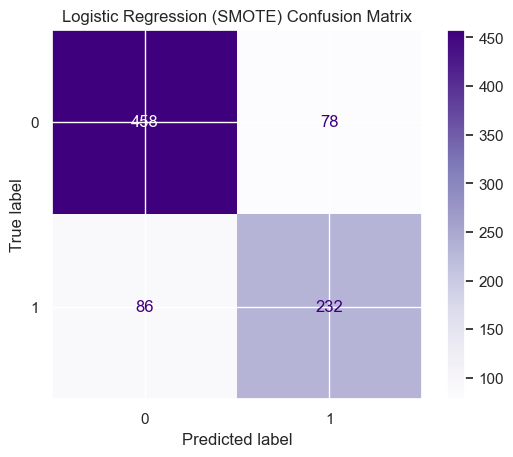

In [23]:

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log_smote, cmap="Purples")
plt.title("Logistic Regression (SMOTE) Confusion Matrix")
plt.show()

In [24]:
#retrain decsion tree
tree_smote = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_smote.fit(X_train_bal, y_train_bal)

y_pred_tree_smote = tree_smote.predict(X_test)

print("Decision Tree (SMOTE) Accuracy:", accuracy_score(y_test, y_pred_tree_smote))
print("Precision:", precision_score(y_test, y_pred_tree_smote))
print("Recall:", recall_score(y_test, y_pred_tree_smote))
print("F1 Score:", f1_score(y_test, y_pred_tree_smote))

Decision Tree (SMOTE) Accuracy: 0.9648711943793911
Precision: 0.9363636363636364
Recall: 0.9716981132075472
F1 Score: 0.9537037037037037


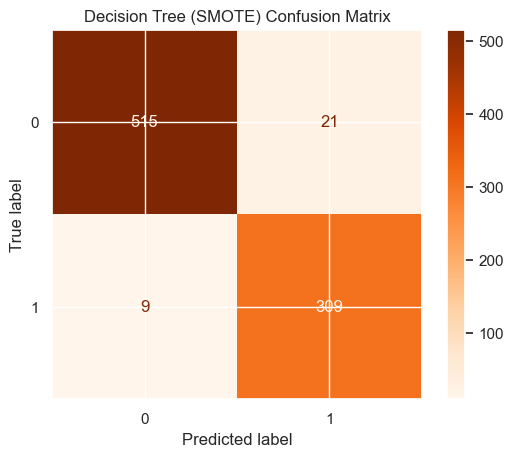

In [25]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_tree_smote, cmap="Oranges")
plt.title("Decision Tree (SMOTE) Confusion Matrix")
plt.show()

## 7. Comparison — Before vs After SMOTE

- **Without SMOTE:** Models may show high accuracy but low recall on the minority class (e.g., predicting most loans as approved).  
- **With SMOTE:** Models should have better recall and F1-score on the minority class, though sometimes at the cost of overall accuracy.  
- **Takeaway:** Always check for imbalanced data when building classification models.  
